In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
dataset = pd.read_excel('/Users\hp\Documents\Downloads\HR_Employee_Attrition-1.xlsx')

dataset.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
dataset.shape

(2940, 35)

In [4]:
# Object type datatype:
category_cols = dataset.select_dtypes('object')

In [5]:
category_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [6]:
for i in category_cols:
    print(f"Unique Values in {i} are :")
    print(category_cols[i].value_counts())
    print("*"*50)

Unique Values in Attrition are :
No     2466
Yes     474
Name: Attrition, dtype: int64
**************************************************
Unique Values in BusinessTravel are :
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
**************************************************
Unique Values in Department are :
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
**************************************************
Unique Values in EducationField are :
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
**************************************************
Unique Values in Gender are :
Male      1764
Female    1176
Name: Gender, dtype: int64
**************************************************
Unique Values in JobRole are :
Sales Ex

In [7]:
dataset.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Drop over 18 column:
dataset.drop(columns='Over18', inplace=True)

In [9]:
# check null values
dataset.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [10]:
#Descriptive analysis
categorical_dataset = dataset.describe(include=['object']).T

In [11]:
categorical_dataset

,count,unique,top,freq
Attrition,2940,2,No,2466
BusinessTravel,2940,3,Travel_Rarely,2086
Department,2940,3,Research & Development,1922
EducationField,2940,6,Life Sciences,1212
Gender,2940,2,Male,1764
JobRole,2940,9,Sales Executive,652
MaritalStatus,2940,3,Married,1346
OverTime,2940,2,No,2108


In [12]:
categorical_dataset['pct'] = (categorical_dataset['freq']/categorical_dataset['count'])*100

In [13]:
categorical_dataset

,count,unique,top,freq,pct
Attrition,2940,2,No,2466,83.877551
BusinessTravel,2940,3,Travel_Rarely,2086,70.952381
Department,2940,3,Research & Development,1922,65.37415
EducationField,2940,6,Life Sciences,1212,41.22449
Gender,2940,2,Male,1764,60.0
JobRole,2940,9,Sales Executive,652,22.176871
MaritalStatus,2940,3,Married,1346,45.782313
OverTime,2940,2,No,2108,71.70068


In [14]:
# Attrition vs Business travel
dataset.groupby(['Attrition'])['BusinessTravel'].count()

Attrition
No     2466
Yes     474
Name: BusinessTravel, dtype: int64

In [15]:
dataset.groupby(['BusinessTravel'])['Attrition'].count()

BusinessTravel
Non-Travel            300
Travel_Frequently     554
Travel_Rarely        2086
Name: Attrition, dtype: int64

In [16]:
dataset.groupby(['Attrition', 'BusinessTravel'])['MonthlyIncome'].mean()

Attrition  BusinessTravel   
No         Non-Travel           6350.746377
           Travel_Frequently    6828.091346
           Travel_Rarely        6908.818489
Yes        Non-Travel           5240.750000
           Travel_Frequently    4281.434783
           Travel_Rarely        4975.852564
Name: MonthlyIncome, dtype: float64

In [17]:
## Observation:
#Salary for those leaving the organization is lower comapratively to those who are not leaving 
#salary is lower for those who are travelling very frequently and leaving the organization 


In [18]:
#Attrition vs performance rating vs percentsalaryhike
dataset.groupby(['Attrition', 'PerformanceRating'])['PercentSalaryHike'].mean()

Attrition  PerformanceRating
No         3                    14.040230
           4                    21.809524
Yes        3                    13.810000
           4                    22.054054
Name: PercentSalaryHike, dtype: float64

In [19]:
## Observation:
# No difference observed between Attirated and non attirated employees

In [20]:
#Continous univariate Analysis

In [21]:
def Continous_univariate_Analysis(data,
                                  feature,
                                  figsize=(12, 7),
                                  kde=False,
                                  bins=None):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={"height_ratios": (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette('crest', as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='violet')
    sns.histplot(
        data=data, x=feature, ax=ax_hist, kde=kde, bins=bins,
        color='crest') if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist)

    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='red', linestyle='-')

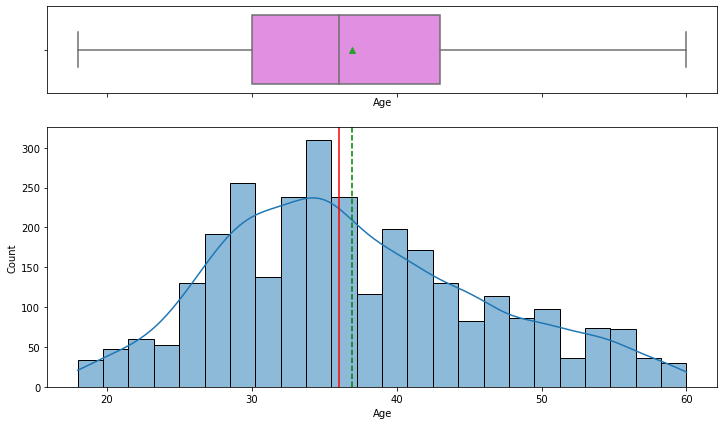

In [22]:
#Age analysis:
Continous_univariate_Analysis(dataset, 'Age', kde=True)

In [23]:
## Observation
# Age is normally distributed 
# no outlier observed 
# mean is near to median 


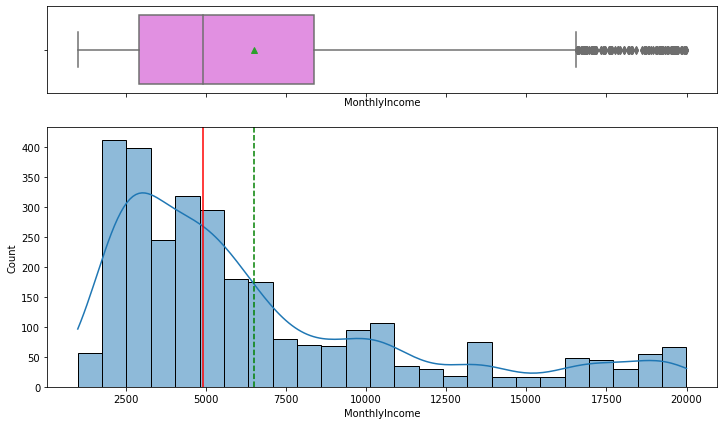

In [24]:
Continous_univariate_Analysis(dataset, 'MonthlyIncome', kde=True)

In [25]:
## Observation
# distribution is left skewed 
# Above 16000, all the salaries are treated as outliers
# As it is left skewed, it has good differnce between mean and median 
# Majority of the employees are earning between 3000 to 8000 dollars per month 
# 8% employees are earning above 16K dollars
# Only Manager and  Research Director earning more than 16K dollars 

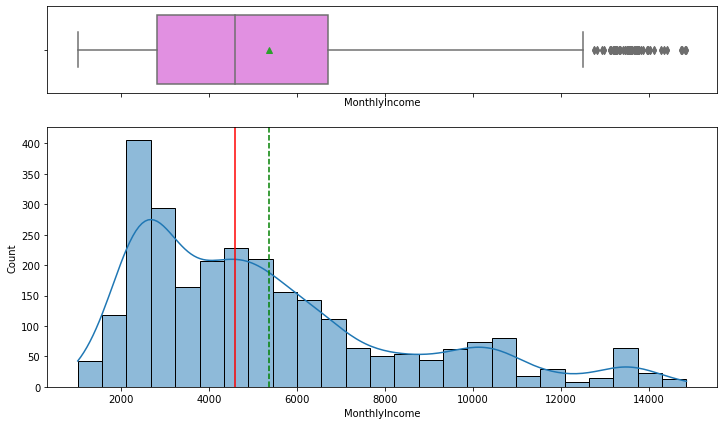

In [26]:
Continous_univariate_Analysis(dataset[dataset['MonthlyIncome']<=15000], 'MonthlyIncome', kde=True)

In [27]:
dataset[dataset['MonthlyIncome']>=16000]['JobRole'].unique()

array(['Manager', 'Research Director'], dtype=object)

In [28]:
## Attrition vs Earnings vs Salary Hike

C:\Users\hp\anaconda3\conda-meta\set up\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\conda-meta\set up\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\conda-meta\set up\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

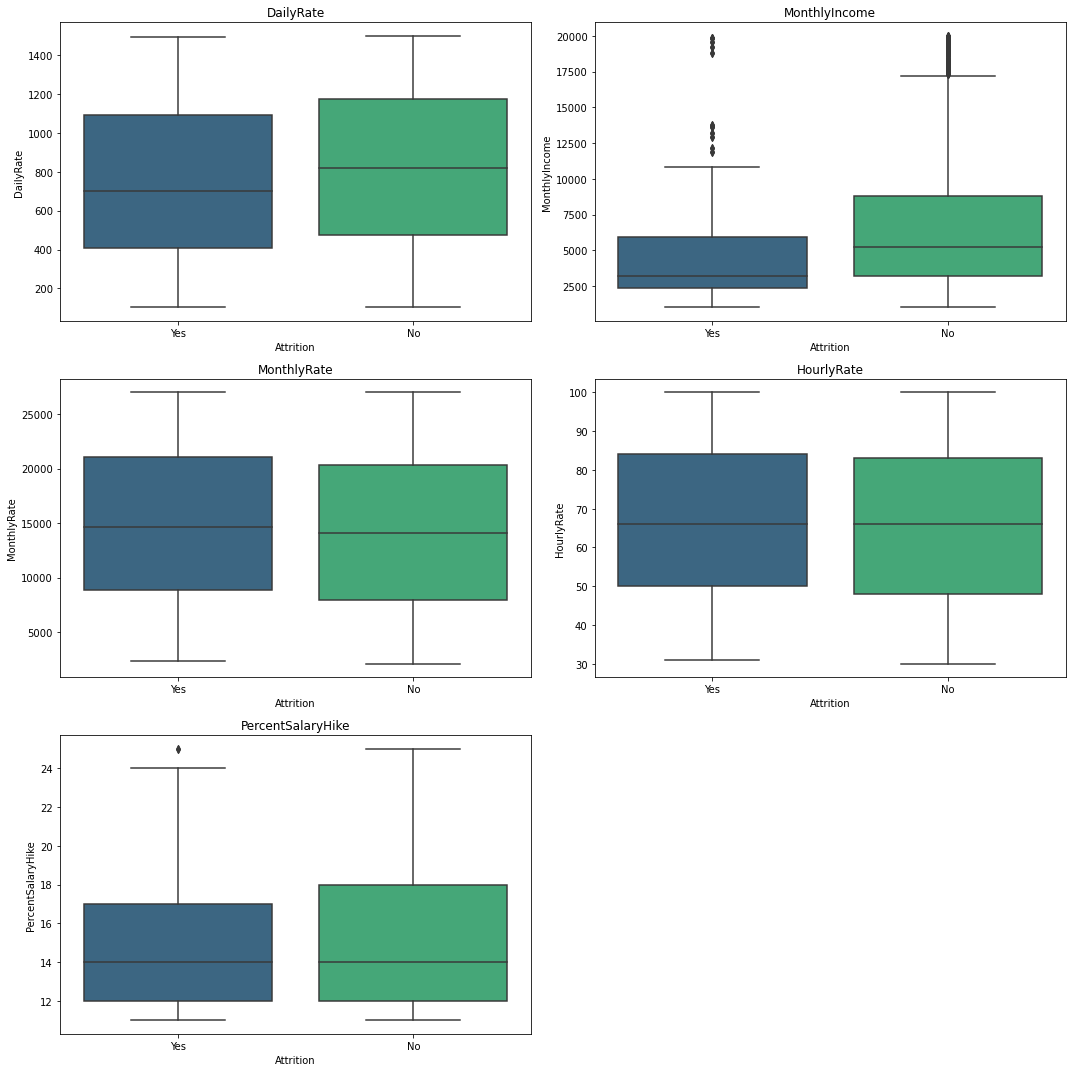

In [29]:
cols = dataset[['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(15,15))
for i, variable in enumerate(cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(dataset['Attrition'], dataset[variable], palette='viridis')
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [30]:
#Monthly income vs attrition
dataset.groupby(['Attrition'])['MonthlyIncome'].mean()

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

In [31]:
# observation:
#not much higher difference so binning technique is used

In [32]:
dataset.PercentSalaryHike.value_counts(bins=3)

(10.985000000000001, 15.667]    1838
(15.667, 20.333]                 760
(20.333, 25.0]                   342
Name: PercentSalaryHike, dtype: int64

In [33]:
bins = [10,15,20,25]
labels = ['avg_hike', 'moderate_hike', 'higher_hike']
dataset['hike_category'] = pd.cut(dataset['PercentSalaryHike'], bins=bins, labels=labels, include_lowest=True)

In [34]:
dataset.groupby(['Attrition', 'hike_category']).agg({
    'EmployeeNumber': 'count',
    'MonthlyIncome': 'mean',
    'PercentSalaryHike':'mean'
})

EmployeeNumber  MonthlyIncome  PercentSalaryHike
Attrition hike_category                                                  
No        avg_hike                 1538    6952.018205          12.791938
          moderate_hike             646    6323.266254          17.897833
          higher_hike               282    7349.297872          22.425532
Yes       avg_hike                  300    5001.240000          12.633333
          moderate_hike             114    4773.280702          17.666667
          higher_hike                60    3742.600000          22.533333

In [35]:
## Observation:
1. The mean of the monthly income for those who are leaving the organization is 2000$ cheaper of average income 
2. Daily Rate is not so impacting
3. mean is same for salary hike which is 15% but we need to dig more information for those who get higher hikes
4. More hike can be given to lower salary group which may not impact there salary more than average salary 
5. No significant observation for Monthly rate, hourly rate and daily rate 

SyntaxError: invalid syntax (939539182.py, line 2)

In [ ]:
# Attrition vs experience
cols = dataset[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
               'TrainingTimesLastYear']].columns.tolist()

plt.figure(figsize=(15, 15))
for i, variable in enumerate(cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(dataset['Attrition'], dataset[variable], palette="magma")
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [ ]:
## Observation:
# Those who left the organization are less experience (3 yrs) 
# Those who are working with same manager for more than 2 yrs are tend to leave the organization 
# Promotion time period is same for both the cases. They tend to leave if promotion is not delivered within 1 yrs 
# Employees with same role for more than 2 yrs tends to leave the organization 
# Training time has no impact on Attrition 

In [ ]:
# attrition vs number of working years:

cols = dataset[['NumCompaniesWorked', 'TotalWorkingYears']].columns.tolist()

plt.figure(figsize=(15,5))
for i, variable in enumerate(cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(dataset['Attrition'], dataset[variable], palette="magma")
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [ ]:
## Discrete Bi-variate analysis : Business Travel vs ATTRITION
def discrete_bivariate_analysis(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print('*'*100)
    tab= pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(loc="lower left", frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor = (1,1))
    plt.show()

In [ ]:
discrete_bivariate_analysis(dataset,'BusinessTravel', 'Attrition')

In [ ]:
discrete_bivariate_analysis(dataset,'JobRole', 'Attrition')

In [ ]:
# Multivariant Analysis:
plt.figure(figsize=(15, 8))
sns.boxplot(dataset['PerformanceRating'], dataset['PercentSalaryHike'], hue=dataset['JobRole'])
plt.show()

In [ ]:
pop_view= dataset.groupby(['Gender','MaritalStatus'])['Department'] .nunique()

In [ ]:
pop_view


In [ ]:
value_pcts=pop_view.groupby(level=0).apply(lambda x:round(100*x/float(x.sum()),2)).reset_index()

In [ ]:
value_pcts